In [178]:
import numpy as np

In [179]:
input_dim = 3
l1_dim = 10
l2_dim = 10
l3_dim = 10
output_dim = 1

In [180]:
W1 = np.random.uniform(-0.5, 0.5, size=(input_dim, l1_dim))
b1 = np.zeros((1, l1_dim))
W2 = np.random.uniform(-0.5, 0.5, size=(l1_dim, l2_dim))
b2 = np.zeros((1, l2_dim))
W3 = np.random.uniform(-0.5, 0.5, size=(l2_dim, l3_dim)) 
b3 = np.zeros((1, l3_dim))
W4 = np.random.uniform(-0.5, 0.5, size=(l3_dim, output_dim))
b4 = np.zeros((1, output_dim))

In [181]:
print("W1:", W1.shape, "b1:", b1.shape)
print("W2:", W2.shape, "b2:", b2.shape)
print("W3:", W3.shape, "b3:", b3.shape)
print("W4:", W4.shape, "b4:", b4.shape)

W1: (3, 10) b1: (1, 10)
W2: (10, 10) b2: (1, 10)
W3: (10, 10) b3: (1, 10)
W4: (10, 1) b4: (1, 1)


In [182]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [183]:
def sigmoid_derivative(s):
    return s * (1.0 - s)

In [184]:
print(sigmoid(0))
print(sigmoid(10))

0.5
0.9999546021312976


In [185]:
X_train = np.load("X_train_scaled.npy")
y_train = np.load("Y_train.npy")
print(y_train.shape)

(10000, 1)


In [186]:
Z1 = np.dot(X_train, W1) + b1
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2) + b2
A2 = sigmoid(Z2)

Z3 = np.dot(A2, W3) + b3
A3 = sigmoid(Z3)

Z4 = np.dot(A3, W4) + b4
y_pred = sigmoid(Z4)

In [187]:
print(y_pred.shape)

(10000, 1)


In [188]:
print(y_pred[:10])

[[0.579226  ]
 [0.57991288]
 [0.57958543]
 [0.57965874]
 [0.57881077]
 [0.57906702]
 [0.57870037]
 [0.57986994]
 [0.57974118]
 [0.57972413]]


In [189]:
print(y_pred.mean())

0.5793819624153874


In [190]:
loss_initial = np.mean((y_pred - y_train)**2)
print("Initial MSE loss: ", loss_initial)

Initial MSE loss:  0.2276519878666497


In [191]:
m = y_train.shape[0]

In [192]:
#layar 4
dA4 = (2 / m) * (y_pred - y_train)
dZ4 = dA4 * (y_pred * (1 - y_pred))
dW4 = (A3.T @ dZ4) / m
db4 = np.sum(dZ4, axis=0, keepdims=True) / m
dA3 = dZ4 @ W4.T

#layar 3
dZ3 = dA3 * (A3 * (1 - A3))
dW3 = (A2.T @ dZ3) / m
db3 = np.sum(dZ3, axis=0, keepdims=True) / m
dA2 = dZ3 @ W3.T

#layar 2
dZ2 = dA2 * (A2 * (1 - A2))
dW2 = (A1.T @ dZ2) / m
db2 = np.sum(dZ2, axis=0, keepdims=True) / m
dA1 = dZ2 @ W2.T

#layar 1
dZ1 = dA1 * (A1 * (1 - A1))
dW1 = (X_train.T @ dZ1) / m
db1 = np.sum(dZ1, axis=0, keepdims=True) / m


In [193]:
learning_rate = 0.1

W1 = W1 - learning_rate * dW1
b1 = b1 - learning_rate * db1

W2 = W2 - learning_rate * dW2
b2 = b2 - learning_rate * db2

W3 = W3 - learning_rate * dW3
b3 = b3 - learning_rate * db3

W4 = W4 - learning_rate * dW4
b4 = b4 - learning_rate * db4

In [194]:
Z1 = np.dot(X_train, W1) + b1
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2) + b2
A2 = sigmoid(Z2)

Z3 = np.dot(A2, W3) + b3
A3 = sigmoid(Z3)

Z4 = np.dot(A3, W4) + b4
y_pred = sigmoid(Z4)

In [195]:
loss = np.mean((y_pred - y_train)**2)
print("MSE loss: ", loss_initial)

MSE loss:  0.2276519878666497


In [196]:
print(y_pred[:10])

[[0.57922641]
 [0.57991328]
 [0.57958584]
 [0.57965915]
 [0.57881118]
 [0.57906742]
 [0.57870078]
 [0.57987035]
 [0.57974159]
 [0.57972453]]


In [197]:
num_epochs = 100
learning_rate = 0.5

loss_list = []

for epoch in range(1, num_epochs + 1):

    Z1 = X_train @ W1 + b1
    A1 = sigmoid(Z1)

    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)

    Z3 = A2 @ W3 + b3
    A3 = sigmoid(Z3)

    Z4 = A3 @ W4 + b4
    A4 = sigmoid(Z4)

    loss = np.mean((A4 - y_train)**2)
    loss_list.append(loss)

    dA4 = (2/m) * (A4 - y_train)
    dZ4 = dA4 * sigmoid_derivative(A4)
    dW4 = (A3.T @ dZ4) / m
    db4 = np.sum(dZ4, axis=0, keepdims=True) / m

    dA3 = dZ4 @ W4.T
    dZ3 = dA3 * sigmoid_derivative(A3)
    dW3 = (A2.T @ dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dA2 = dZ3 @ W3.T
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = (A1.T @ dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = (X_train.T @ dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W4 -= learning_rate * dW4
    b4 -= learning_rate * db4

    if epoch % 10 == 0:
        print(f"Epoch {epoch:3d} | Loss = {loss:.6f}")

Epoch  10 | Loss = 0.227648


Epoch  20 | Loss = 0.227644
Epoch  30 | Loss = 0.227640
Epoch  40 | Loss = 0.227636
Epoch  50 | Loss = 0.227632
Epoch  60 | Loss = 0.227628
Epoch  70 | Loss = 0.227624
Epoch  80 | Loss = 0.227620
Epoch  90 | Loss = 0.227616
Epoch 100 | Loss = 0.227612


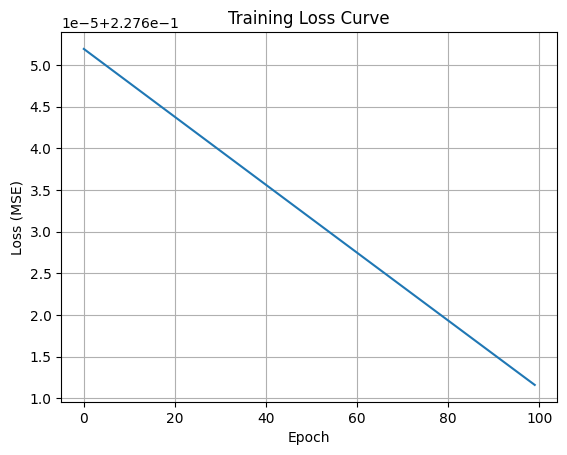

In [198]:
import matplotlib.pyplot as plt

plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


In [199]:
X_test = np.load("X_test_scaled.npy")
y_test = np.load("Y_test.npy")

In [200]:
y_test.shape
X_test.shape

(2000, 3)

In [201]:
Z1_test = X_test @ W1 + b1
A1_test = sigmoid(Z1_test)

Z2_test = A1_test @ W2 + b2
A2_test = sigmoid(Z2_test)

Z3_test = A2_test @ W3 + b3
A3_test = sigmoid(Z3_test)

Z4_test = A3_test @ W4 + b4
y_pred_test = sigmoid(Z4_test)

In [202]:
y_pred_test.shape

(2000, 1)

In [203]:
y_pred_binary = (y_pred_test >= 0.5).astype(np.int32)

correct = np.sum(y_pred_binary == y_test)

accuracy = correct / y_test.shape[0]

print(accuracy)

0.69
